## 1.4.10 Histograms in OpenCV

In [13]:
img = cv2.imread('home.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [14]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

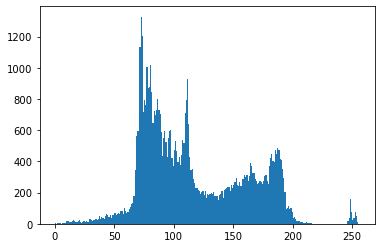

In [16]:
img = cv2.imread('home.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

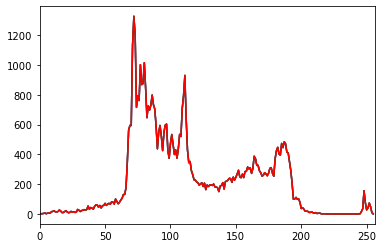

In [19]:
img = cv2.imread('home.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [21]:
img = cv2.imread('home.jpg',0)

In [22]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

In [23]:
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

(0.0, 256.0)

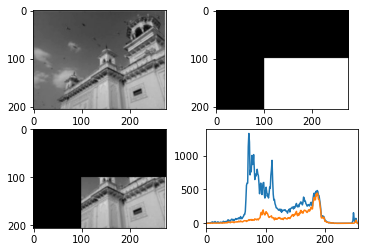

In [24]:
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

In [25]:
plt.show()

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [27]:
img = cv2.imread('wiki.jpg',0)

In [28]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

In [29]:
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

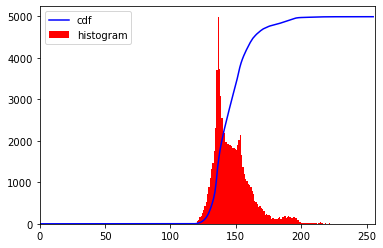

In [30]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [31]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [32]:
img2 = cdf[img]

In [33]:
img = cv2.imread('wiki.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True